In [1]:
#Negative Image
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
img=Image.open('dataset/yoda2.jpg')
im_invert = ImageOps.invert(img)
plt.imshow(im_invert)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


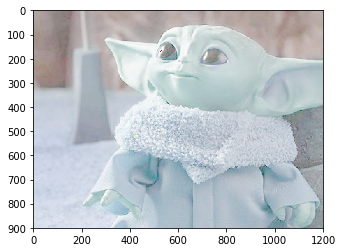

In [2]:
#Log transformation
import cv2 
import numpy as np 
image = cv2.imread('dataset/yoda2.jpg')
c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1))
log_image = np.array(log_image, dtype = np.uint8)
plt.imshow(log_image) 
plt.show() 

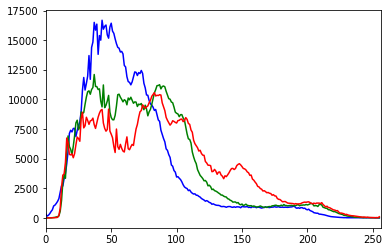

In [3]:
#Plotting Histogram of RGB channels
color = ('b', 'g', 'r')
for i, col in enumerate(color): 
    histr = cv2.calcHist([image], [i], None, [256], [0, 256]) 
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show() 

D:\Anaconda3\lib\site-packages\skimage\exposure\exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


Text(0.5,1,'Histogram equalization')

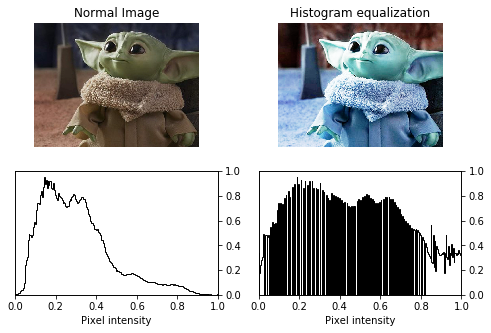

In [4]:
#Histogram Equalization
from skimage import exposure
from skimage import data, img_as_float

def plot_img_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])
    return ax_img, ax_hist

img_eq = exposure.equalize_hist(image)
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 2), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 2, 1)
for i in range(1, 2):
    axes[0, i] = fig.add_subplot(2, 2, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 2):
    axes[1, i] = fig.add_subplot(2, 2, 3+i)
    
ax_img, ax_hist= plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Normal Image')    
    
ax_img, ax_hist= plot_img_and_hist(img_eq, axes[:, 1])
ax_img.set_title('Histogram equalization')

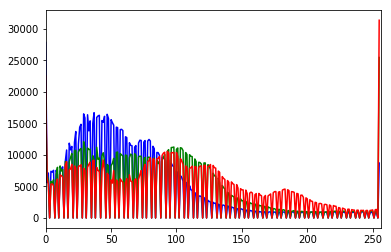

In [20]:
#Contrast Strecthing
p2 = np.percentile(img, 2)
p98 = np.percentile(img, 98)
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))
color = ('b', 'g', 'r')
for i, col in enumerate(color): 
    histr = cv2.calcHist([img_rescale], [i], None, [256], [0, 256]) 
    plt.plot(histr, color = col) 
    plt.xlim([0, 256]) 
      
plt.show() 

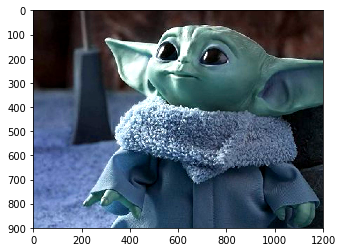

In [18]:
plt.imshow(img_rescale)